In [75]:
from metal.layers.conv2D import Conv2D
import numpy as np
from metal.initializers.optimizer_init import OptimizerInitializer, Adam
from metal.layers.pooling import Pool2D
from metal.initializers.scheduler_init import SchedulerInitializer


In [76]:
imgs = np.load('../../downloads/catdog.npy',allow_pickle=True)
labels = np.load('../../downloads/catdoglabels.npy',allow_pickle=True)

In [77]:
X = imgs
y = labels

In [78]:
c1 = Conv2D(1,(5,5),'same',stride=1,optimizer=Adam(),act_fn='relu')
p1 = Pool2D((2,2),pad='same',optimizer=Adam())

In [79]:
c1.kernel_shape
c1.in_ch =3
c1._init_params()
c1.act_fn

In [80]:
def train_test_split(X, y, test_size=0.5, shuffle=True, seed=None):
    """ Split the data into train and test sets """
    if shuffle:
        X, y = shuffle_data(X, y, seed)
    # Split the training data from test data in the ratio specified in
    # test_size
    split_i = len(y) - int(len(y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]

    return X_train, X_test, y_train, y_test

def shuffle_data(X, y, seed=None):
    """ Random shuffle of the samples in X and y """
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]


In [81]:
X_train_, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, seed = 1)


In [82]:
X_train = X_train_[457].reshape((1,224,224,3))
X_train.shape

(1, 224, 224, 3)

In [85]:
z=c1.forward(np.random.randn(1,1,1,3))

In [22]:
p = p1.forward(z)

In [23]:
p.shape
c2 = Conv2D(1,(5,5),'same',stride=1,optimizer=Adam(),act_fn='relu')


In [24]:
z2=c2.forward(p)

In [25]:
z2.shape

(1, 224, 224, 1)

In [26]:
import matplotlib.pyplot as plt


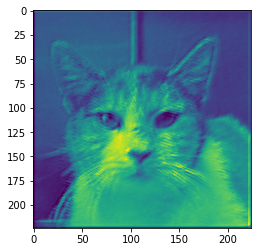

In [28]:
plt.imshow(z2[0].reshape( 224, 224),interpolation='lanczos')

In [61]:
from metal.initializers.optimizer_init import OptimizerInitializer, Adam
import numpy as np

In [2]:
adam = OptimizerInitializer('adam')()
actoutrelu_ = np.array([[1.62434536, 0.,         0.        ],
                        [0.,         0.86540763, 0.        ]])

actaffine_ = np.array([[ 1.62434536, -0.61175641, -0.52817175],
                        [-1.07296862,  0.86540763, -2.3015387 ]])
print(adam)

Adam(lr=0.001, decay1=0.9, decay2=0.999, eps=1e-07, clip_norm=None, lr_scheduler=ConstantScheduler(lr=0.001))


In [3]:
adout=adam.update(actaffine_,actoutrelu_,'p1')

In [4]:
print(adam)

Adam(lr=0.001, decay1=0.9, decay2=0.999, eps=1e-07, clip_norm=None, lr_scheduler=ConstantScheduler(lr=0.001))


In [5]:
adout

array([[ 1.62334536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86440763, -2.3015387 ]])

In [36]:
from metal.optimizers.optimizer import OptimizerBase, Adam
from metal.initializers.activation_init import ActivationInitializer


In [37]:
adam = Adam(lr=1e-5)
adam.hyperparameters

{'id': 'Adam',
 'lr': 1e-05,
 'eps': 1e-07,
 'decay1': 0.9,
 'decay2': 0.999,
 'clip_norm': None,
 'lr_scheduler': 'ConstantScheduler(lr=1e-05)'}

In [8]:
#adam.update(actaffine_,actoutrelu_,'p1')

In [9]:
dic = OptimizerInitializer({'hyperparameters':{'id':'Adam',
                                              'lr':10}})

In [10]:
op2 = dic()

In [11]:
dic.param['hyperparameters']

{'id': 'Adam', 'lr': 10}

In [13]:
op2.hyperparameters

{'id': 'Adam',
 'lr': 10,
 'eps': 1e-07,
 'decay1': 0.9,
 'decay2': 0.999,
 'clip_norm': None,
 'lr_scheduler': 'ConstantScheduler(lr=0.001)'}

In [17]:
ActivationInitializer(None)()

In [32]:
from metal.initializers.weight_init import WeightInitializer


In [34]:
WeightInitializer('<metal.activations.activation.Affine at 0x7f0612c9c590>')

In [35]:
from copy import deepcopy

In [38]:
ac = deepcopy(adam)

In [41]:
ac == adam

False

In [42]:
id(adam)

139663400460816

In [43]:
id(ac)

139663400462928

In [44]:
ac.hyperparameters

{'id': 'Adam',
 'lr': 1e-05,
 'eps': 1e-07,
 'decay1': 0.9,
 'decay2': 0.999,
 'clip_norm': None,
 'lr_scheduler': 'ConstantScheduler(lr=1e-05)'}

In [30]:
np.arange(4)

array([0, 1, 2, 3])

In [34]:
 np.random.uniform(-5, 5, size=(2,2))

array([[-1.87318844, -4.44301587],
       [-2.06137515, -1.43983514]])

In [71]:
cs = SchedulerInitializer(lr=.009)()


In [72]:
cs.lr

0.009

In [73]:
cs.hyperparameters

{'id': 'ConstantScheduler', 'lr': 0.009}

In [74]:
cs.learning_rate()

0.009